# Lottery Number Exploratory Data Analysis
Using historical lottery results, this Jupyter Notebook analyzes and explores the data. Several methods are used to show the realtionships within the data using Python and some of Python's best libraries for data manipulation.

In [16]:
# Import libraries
import os
import math
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from skyfield.api import load

### Data Ingestion

In [17]:
# Import the CSV file
df = pd.read_csv('/Data/Lottery_Powerball_2010.csv')

# Show the first 5 fows of data
df.head()

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0


### Data Cleaning / Transformation

In [18]:
# Splitting up the Winning Numbers so that each number has its own row.
df.columns = ['Date','Numbers','Multiplier']
df["AllNumbers"] = df["Numbers"].map(str)

df2 = df.copy()
del df2['Numbers']
del df2['Multiplier']

df3 = pd.DataFrame(df2['AllNumbers'].str.split(" ").apply(pd.Series, 0).stack())
df3.index = df3.index.droplevel(-1)

In [19]:
# Merge the data into one data frame.
merged = pd.merge(df, df3, how='inner', left_index=True, right_index=True)
del merged['Numbers']
del merged['AllNumbers']
del merged['Multiplier']
merged.columns = ['Date','Number']
merged.reset_index(inplace=True)
merged.head(20)

,index,Date,Number
0,0,09/26/2020,11
1,0,09/26/2020,21
2,0,09/26/2020,27
3,0,09/26/2020,36
4,0,09/26/2020,62
5,0,09/26/2020,24
6,1,09/30/2020,14
7,1,09/30/2020,18
8,1,09/30/2020,36
9,1,09/30/2020,49


In [20]:
# Splitting up the day, month, and year of the date.
split = lambda x: pd.Series([i for i in reversed(x.split('/'))])
dates = merged['Date'].apply(split)
merged2 = pd.merge(merged, dates, how='inner', left_index=True, right_index=True)
del merged2['index']
merged2.columns = ['Date','Number','Year','Day','Month']
merged2.head(20)

,Date,Number,Year,Day,Month
0,09/26/2020,11,2020,26,09
1,09/26/2020,21,2020,26,09
2,09/26/2020,27,2020,26,09
3,09/26/2020,36,2020,26,09
4,09/26/2020,62,2020,26,09
5,09/26/2020,24,2020,26,09
6,09/30/2020,14,2020,30,09
7,09/30/2020,18,2020,30,09
8,09/30/2020,36,2020,30,09
9,09/30/2020,49,2020,30,09


In [21]:
#View the statistics of the new data frame.
merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    8982 non-null   object
 1   Number  8982 non-null   object
 2   Year    8982 non-null   object
 3   Day     8982 non-null   object
 4   Month   8982 non-null   object
dtypes: object(5)
memory usage: 351.0+ KB


In [22]:
# Correct the data type for the Number column.
merged2['Number'] = merged2['Number'].astype(int)
merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    8982 non-null   object
 1   Number  8982 non-null   int64 
 2   Year    8982 non-null   object
 3   Day     8982 non-null   object
 4   Month   8982 non-null   object
dtypes: int64(1), object(4)
memory usage: 351.0+ KB


### Data Visualization / Exploration

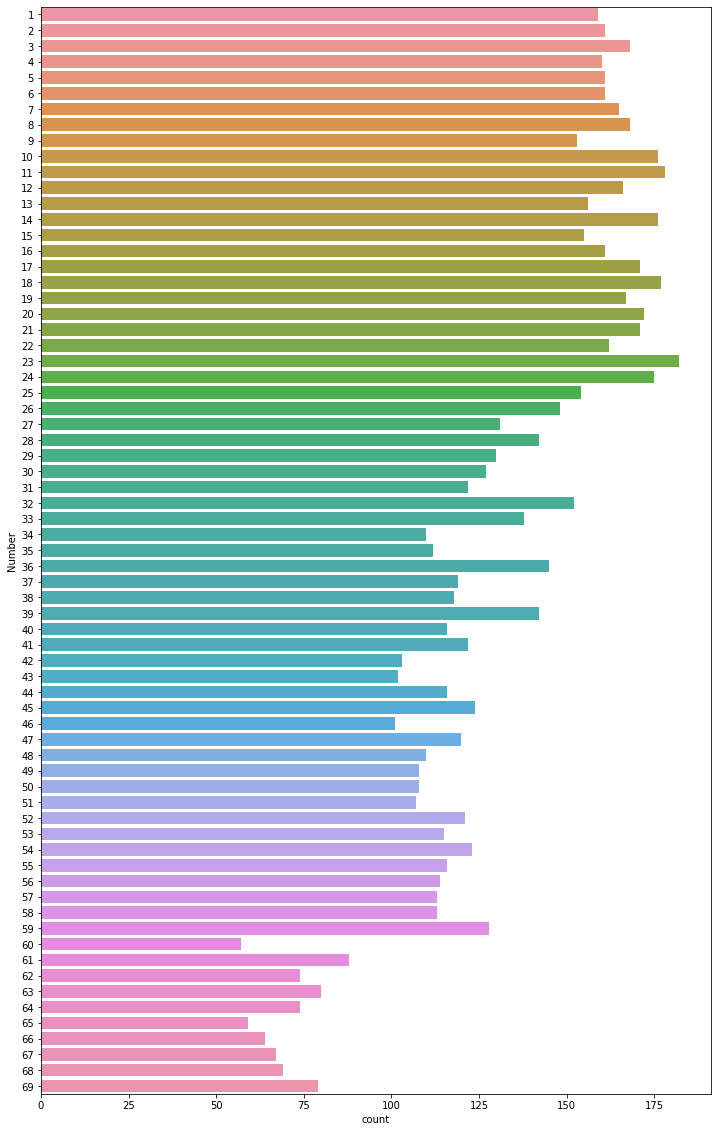

In [25]:
# Using a bar chart to see the frequency of numbers in winning combinations.
plt.rc("figure", figsize=(12, 20))
ax = sns.countplot(y="Number", data= merged2)

From this we can see that numbers in the 60's are not frequently in winning combinations.

In [26]:
# We can also evaluate the winning combinations by adding their numbers.
# We can then see how that compares to the distribution. 
sumtotal = merged2.groupby(['Date']).sum()
sumtotal.describe()

,Number
count,1497.000000
mean,182.267201
std,44.214740
min,60.000000
25%,151.000000
50%,184.000000
75%,212.000000
max,312.000000


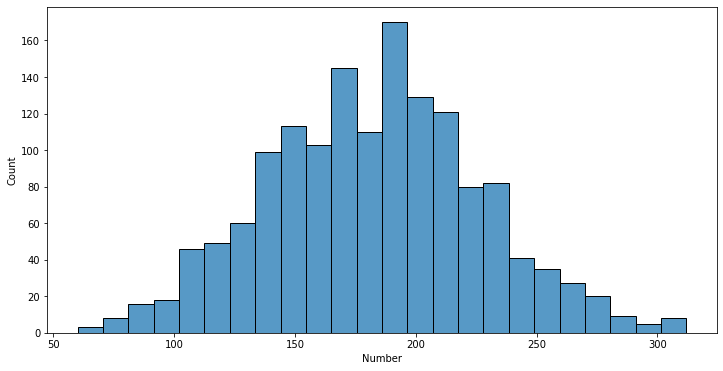

In [29]:
plt.rc("figure", figsize=(12, 6))
ax = sns.histplot(sumtotal['Number'])

From this we see that the winning combinations added up to around 183.

In [35]:
# Showing the 6 most frequently occuring numbers.
n = 6
top6 = merged2['Number'].value_counts()[:n].index.tolist()
print(top6)

[23, 11, 18, 10, 14, 24]


In [36]:
# Showing the 6 least frequently occuring numbers.
n = 6
bottom6 = merged2['Number'].value_counts(ascending=True)[:n].index.tolist()
print(bottom6)

[60, 65, 66, 67, 68, 64]
